In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = [20,10]
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

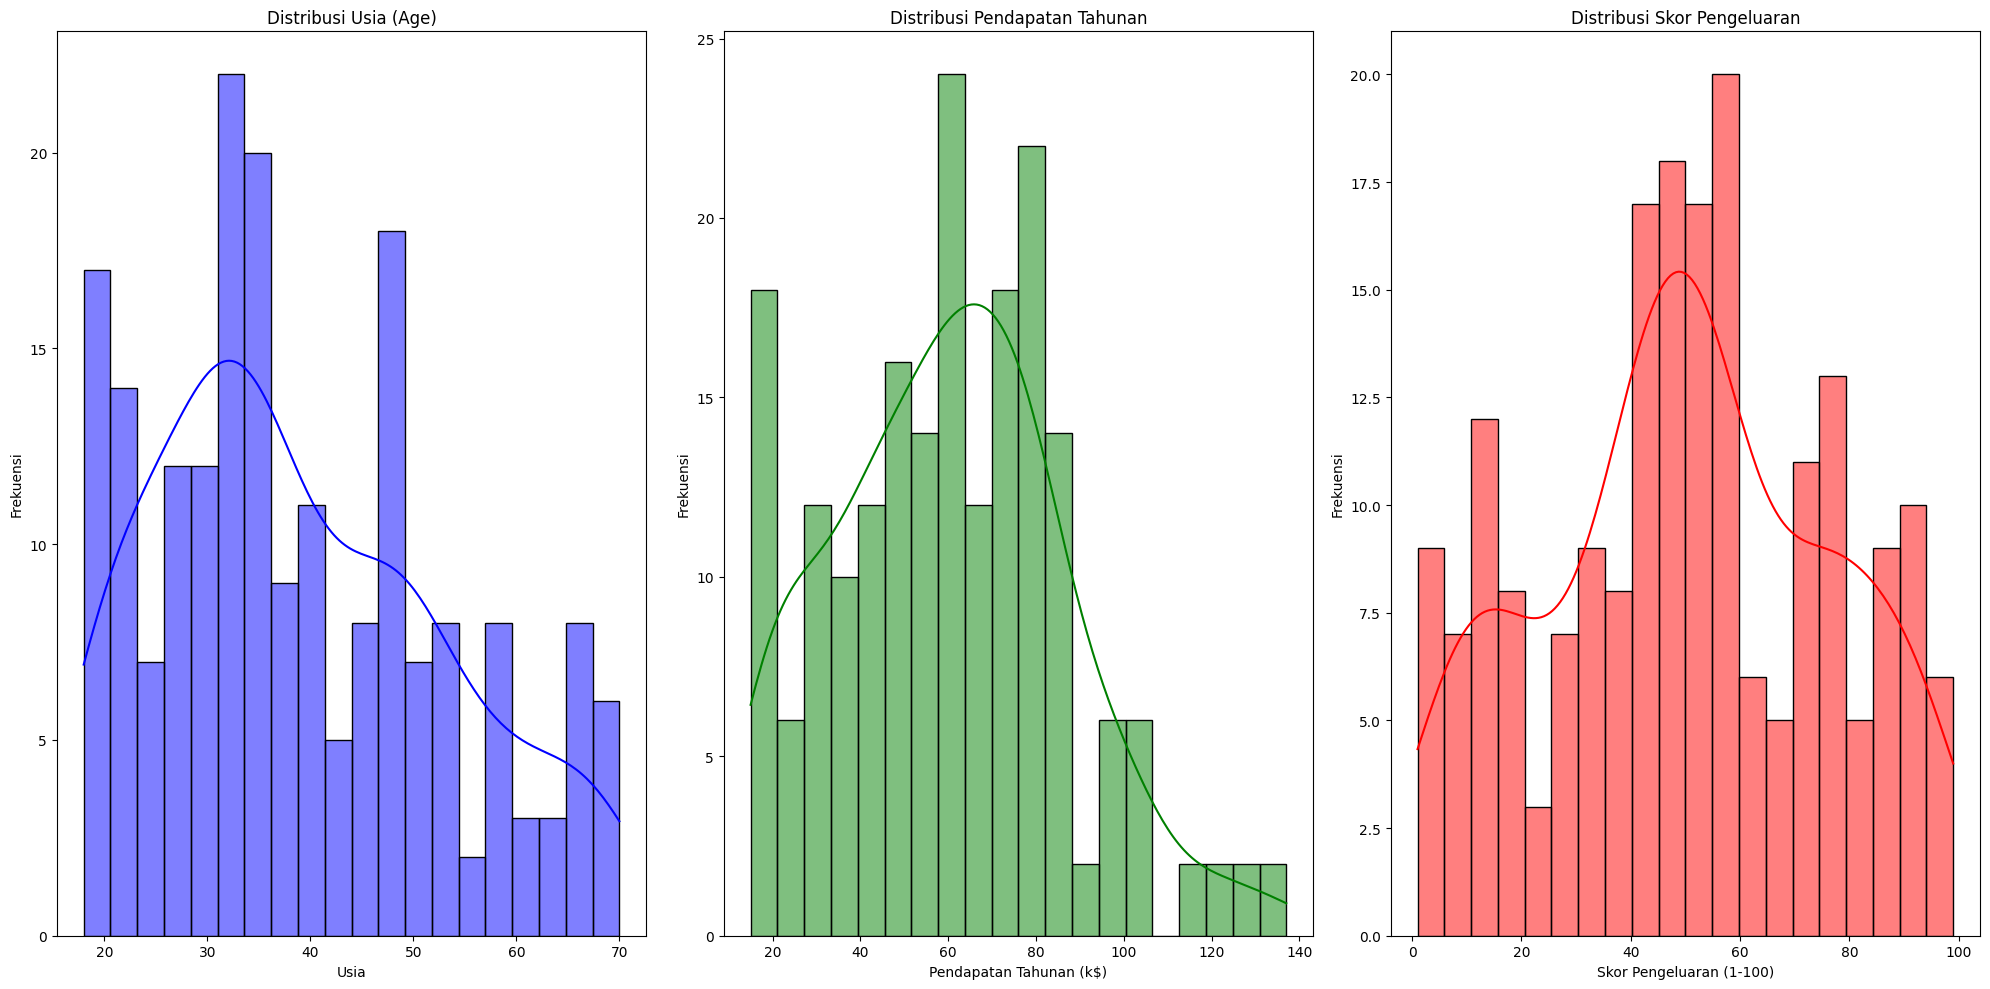

In [5]:
# Distribusi Usia (Age)
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Distribusi Usia (Age)')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')

# Distribusi Pendapatan Tahunan (Annual Income)
plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='green')
plt.title('Distribusi Pendapatan Tahunan')
plt.xlabel('Pendapatan Tahunan (k$)')
plt.ylabel('Frekuensi')

# Distribusi Skor Pengeluaran (Spending Score)
plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='red')
plt.title('Distribusi Skor Pengeluaran')
plt.xlabel('Skor Pengeluaran (1-100)')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

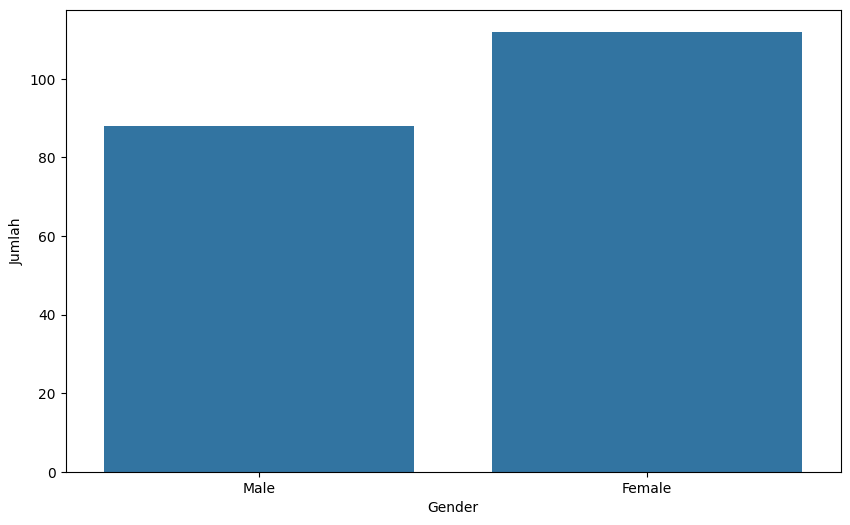

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', data= df)
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show()

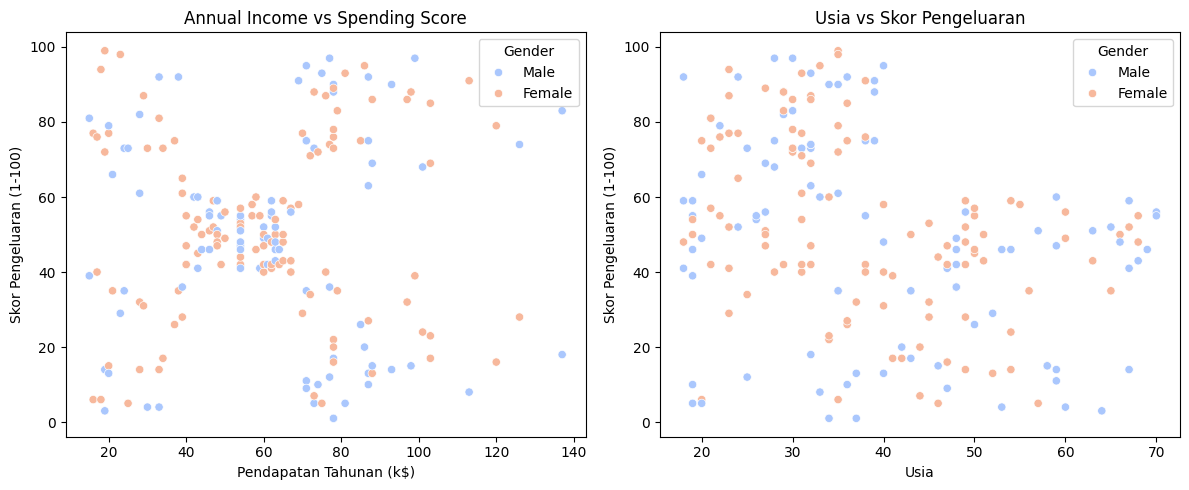

In [8]:
# Hubungan Antar Variabel Numerik
plt.figure(figsize=(12, 5))

# Scatter Plot: Annual Income vs Spending Score
plt.subplot(1, 2, 1)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df, palette='coolwarm')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Pendapatan Tahunan (k$)')
plt.ylabel('Skor Pengeluaran (1-100)')

# Scatter Plot: Age vs Spending Score
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df, palette='coolwarm')
plt.title('Usia vs Skor Pengeluaran')
plt.xlabel('Usia')
plt.ylabel('Skor Pengeluaran (1-100)')

plt.tight_layout()
plt.show()

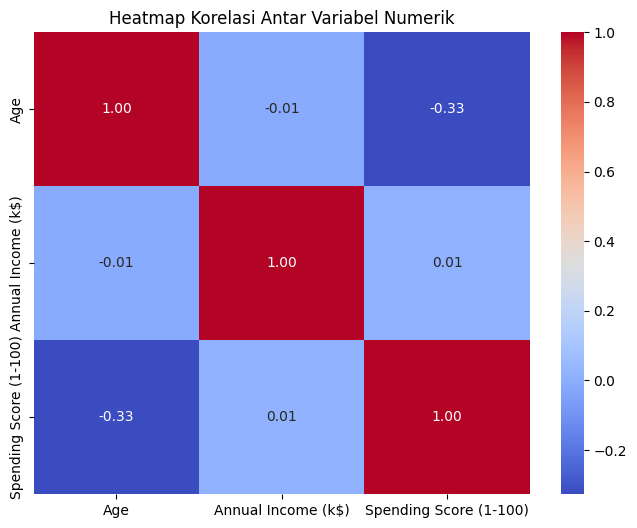

In [15]:
# Heatmap Korelasi
plt.figure(figsize=(8, 6))
corr = df[['Age','Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler

df2 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scalled = scaler.fit_transform(df2)
scalled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [21]:
X_scaled_df = pd.DataFrame(scalled, columns=['Age', 'Annual Income', 'Spending Score'])
X_scaled_df

,Age,Annual Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


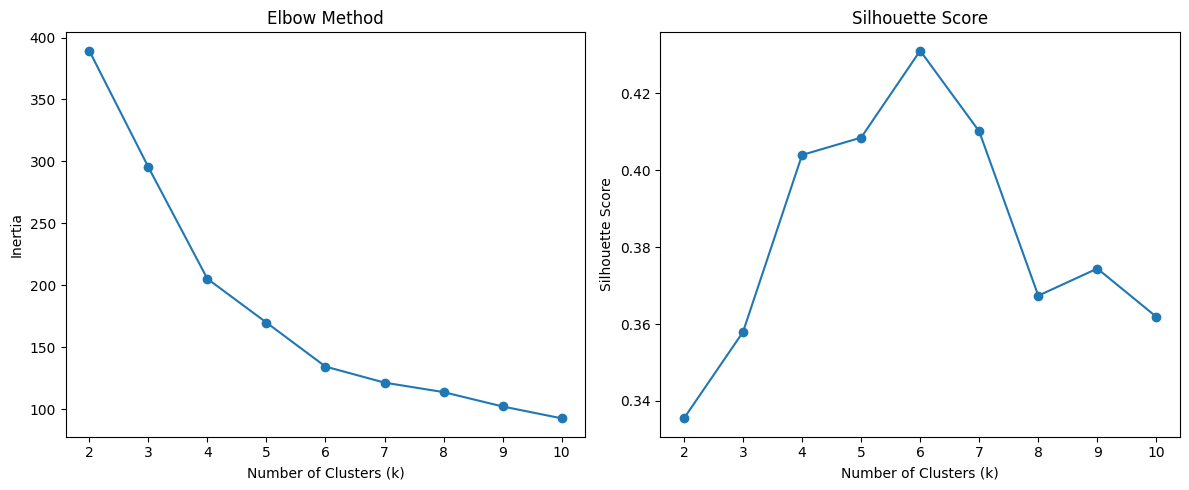

In [23]:
# Import library yang diperlukan
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Menentukan Jumlah Cluster Optimal dengan Elbow Method
inertia = []
silhouette_scores = []
k_values = range(2, 11)  # Coba jumlah cluster dari 2 hingga 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)  # Inersia (Within-Cluster-Sum-of-Squares)
    
    # Hitung Silhouette Score
    silhouette_avg = silhouette_score(X_scaled_df, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)

plt.tight_layout()
plt.show()

In [25]:
optimal_k = 6

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=6, random_state=42)

In [27]:
df['Cluster'] = kmeans.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,5
3,4,Female,23,16,77,2
4,5,Female,31,17,40,5
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,4
197,198,Male,32,126,74,1
198,199,Male,32,137,18,4


<Figure size 1000x600 with 0 Axes>

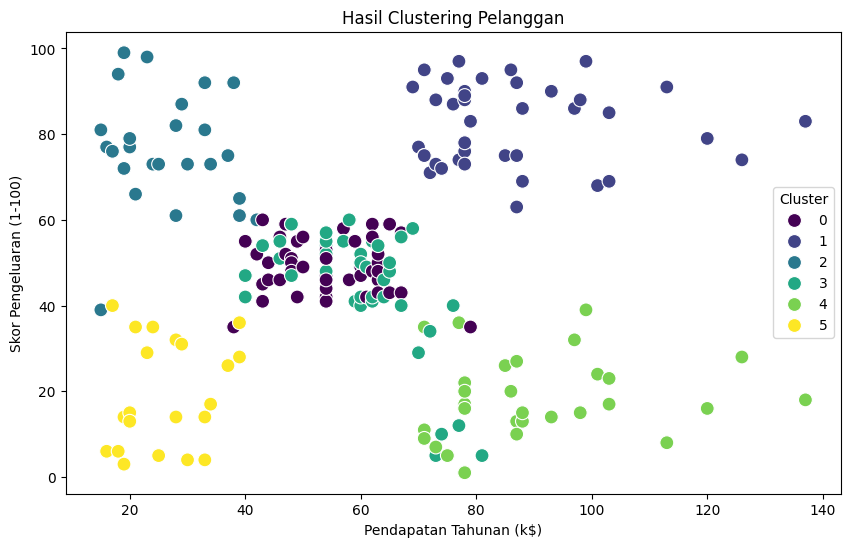

In [31]:
# Visualisasi Hasil Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Hasil Clustering Pelanggan')
plt.xlabel('Pendapatan Tahunan (k$)')
plt.ylabel('Skor Pengeluaran (1-100)')
plt.legend(title='Cluster')
plt.show()

C:\Users\raraslab\AppData\Local\Temp\ipykernel_24884\3466731118.py:9: UserWarning: 
The markers list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  scatter = sns.scatterplot(


<Figure size 1200x800 with 0 Axes>

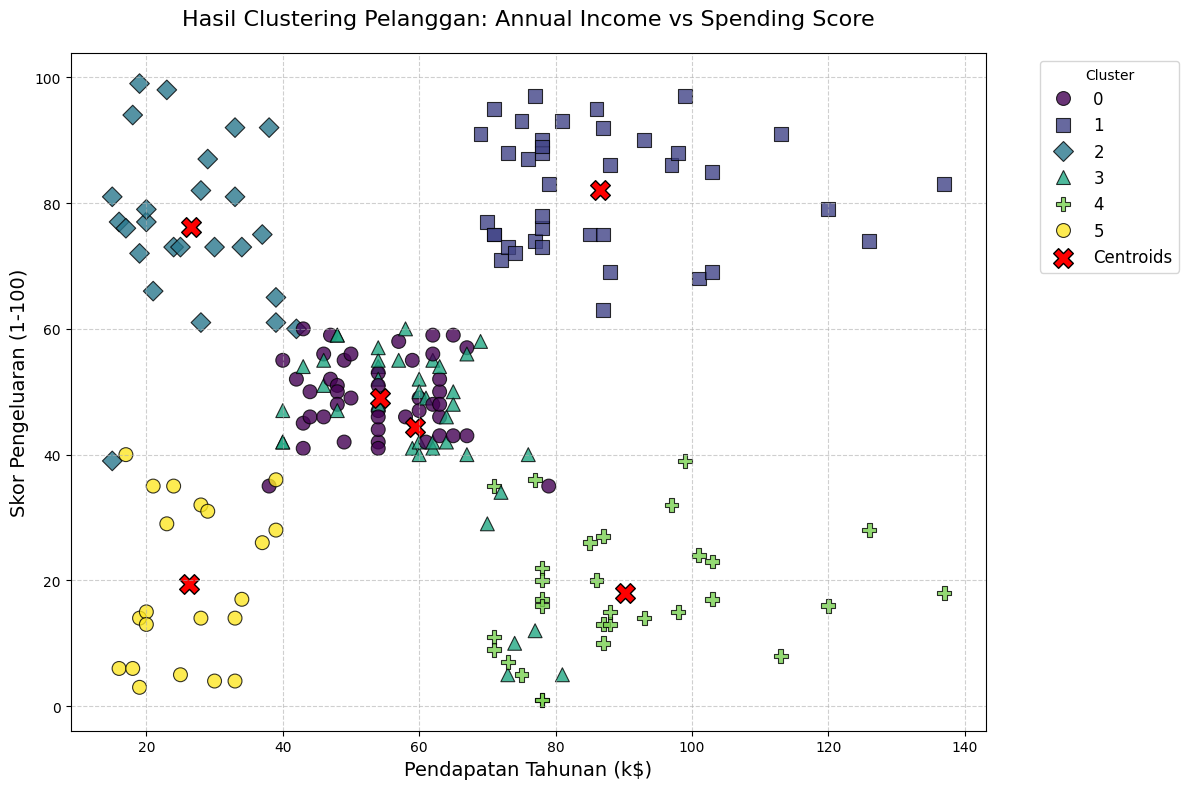

In [37]:
# Import library yang diperlukan
import matplotlib.pyplot as plt
import seaborn as sns

# Buat visualisasi hasil clustering
plt.figure(figsize=(12, 8))

# Scatter plot untuk Annual Income vs Spending Score dengan hasil clustering
scatter = sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Cluster',  # Warna berdasarkan cluster
    data=df, 
    palette='viridis',  # Palette warna yang menarik
    s=100,  # Ukuran titik
    style='Cluster',  # Bentuk marker berdasarkan cluster
    markers=['o', 's', 'D', '^', 'P'],  # Custom marker untuk setiap cluster
    edgecolor='black',  # Garis tepi titik
    alpha=0.8  # Transparansi titik
)

# Tambahkan centroid dari setiap cluster
centroids = kmeans.cluster_centers_  # Ambil centroid dari model K-Means
centroids_scaled = scaler.inverse_transform(centroids)  # Kembalikan ke skala asli

# Plot centroid
plt.scatter(
    centroids_scaled[:, 1],  # Annual Income
    centroids_scaled[:, 2],  # Spending Score
    s=200,  # Ukuran titik centroid
    c='red',  # Warna centroid
    marker='X',  # Bentuk marker centroid
    label='Centroids',  # Label untuk legend
    edgecolor='black'  # Garis tepi centroid
)

# Atur judul dan label
plt.title('Hasil Clustering Pelanggan: Annual Income vs Spending Score', fontsize=16, pad=20)
plt.xlabel('Pendapatan Tahunan (k$)', fontsize=14)
plt.ylabel('Skor Pengeluaran (1-100)', fontsize=14)

# Atur legend
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Atur grid
plt.grid(True, linestyle='--', alpha=0.6)

# Tampilkan plot
plt.tight_layout()
plt.show()